In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import datetime

In [26]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('./finaldata/train_60k.csv')

In [5]:
test = pd.read_csv('./finaldata/test_2k.csv')

In [6]:
test.head()

Source     Sink  SourceInDegree  SourceOutDegree  SinkInDegree  \
0  2184483  1300190             102               83             3   
1  3151356  1452193              39              340           289   
2  1579396   193159              13              208             2   
3  1406432  2481036              16               84            24   
4  2389638   593017              30              267           165   

   SinkOutDegree  CommonNeighbors   Jaccard  ResourceAlloc  AdamicAdar  \
0              0                0  0.000000       0.000000    0.000000   
1              0                4  0.006260       0.000740    0.407705   
2              0                0  0.000000       0.000000    0.000000   
3             14                7  0.062500       0.032617    1.238898   
4             58                6  0.012072       0.006229    0.802812   

   PrefAttach  ShortestPath  N2V_dotprod  
0         435             3     0.131168  
1      102306             2    -0.188574  
2         418             3    -0.021402  
3        2838             2     0.011010  
4       62196             3    -0.044647

In [205]:
df.describe()

Source          Sink  SourceInDegree  SourceOutDegree  \
count  5.979600e+04  5.979600e+04    59796.000000     59796.000000   
mean   2.434256e+06  2.449899e+06      292.687638     13151.831795   
std    1.404072e+06  1.401685e+06      681.225157     76307.239032   
min    1.097000e+03  4.000000e+00        1.000000         0.000000   
25%    1.233876e+06  1.242689e+06       18.000000        71.000000   
50%    2.481393e+06  2.464276e+06       60.000000       224.000000   
75%    3.637241e+06  3.669228e+06      210.000000      1019.000000   
max    4.867046e+06  4.867046e+06     4841.000000    761793.000000   

       SinkInDegree  SinkOutDegree  CommonNeighbors       Jaccard  \
count  59796.000000   59796.000000     59796.000000  59796.000000   
mean      97.351746    1082.193842        11.904308      0.008300   
std      266.226276   14154.277001        55.589267      0.024256   
min        1.000000       0.000000         0.000000      0.000000   
25%        6.000000       0.000000         0.000000      0.000000   
50%       24.000000      22.000000         1.000000      0.000614   
75%       80.000000     200.000000         6.000000      0.005964   
max     4841.000000  761793.000000      3727.000000      1.000000   

       ResourceAlloc    AdamicAdar    PrefAttach  ShortestPath   N2V_dotprod  \
count   59796.000000  59796.000000  5.979600e+04  59796.000000  59796.000000   
mean        0.043690      1.729622  1.898551e+06      2.075256      0.233950   
std         0.582887     10.139769  4.201852e+07      1.519422      0.278118   
min         0.000000      0.000000  1.000000e+00      1.000000     -0.627118   
25%         0.000000      0.000000  3.626000e+03      1.000000      0.029273   
50%         0.000167      0.133032  2.532000e+04      2.000000      0.159646   
75%         0.005320      0.819297  1.627325e+05      3.000000      0.406680   
max        59.638935    762.243515  8.398379e+09     10.000000      0.999866   

          Connected  
count  59796.000000  
mean       0.518362  
std        0.499667  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [202]:
test.describe()

Source          Sink  SourceInDegree  SourceOutDegree  \
count  2.000000e+03  2.000000e+03     2000.000000      2000.000000   
mean   2.431106e+06  2.429986e+06       90.911500      1323.048000   
std    1.418827e+06  1.420581e+06      166.978548      9872.641924   
min    1.452000e+03  5.113000e+03        1.000000         1.000000   
25%    1.202666e+06  1.162797e+06       12.000000        63.000000   
50%    2.456928e+06  2.459976e+06       36.000000       161.000000   
75%    3.655393e+06  3.679264e+06       96.000000       485.250000   
max    4.866498e+06  4.864558e+06     2022.000000    370904.000000   

       SinkInDegree  SinkOutDegree  CommonNeighbors      Jaccard  \
count   2000.000000    2000.000000      2000.000000  2000.000000   
mean     143.195000    1805.310500        11.376000     0.014652   
std      358.116046   27406.063743       100.078352     0.039437   
min        1.000000       0.000000         0.000000     0.000000   
25%        7.000000       0.000000         0.000000     0.000000   
50%       33.000000       0.000000         1.000000     0.002128   
75%      118.000000       0.000000         7.000000     0.011365   
max     4841.000000  761793.000000      4361.000000     0.631579   

       ResourceAlloc   AdamicAdar    PrefAttach  ShortestPath  N2V_dotprod  
count    2000.000000  2000.000000  2.000000e+03   2000.000000  2000.000000  
mean        0.102139     1.913987  9.704483e+05      2.624500     0.093105  
std         1.654372    22.412112  1.720995e+07      1.025195     0.174878  
min         0.000000     0.000000  3.000000e+00      2.000000    -0.464289  
25%         0.000000     0.000000  9.385000e+02      2.000000    -0.021421  
50%         0.000054     0.137745  7.997000e+03      2.000000     0.064569  
75%         0.005683     0.926810  5.273600e+04      3.000000     0.165350  
max        70.173873   986.942415  6.727895e+08     10.000000     0.887730

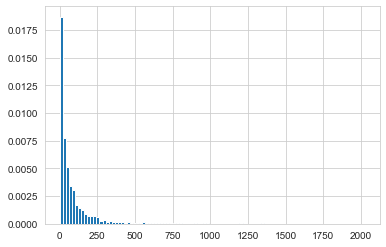

In [37]:
test['SourceInDegree'].hist(bins=100, density = True)

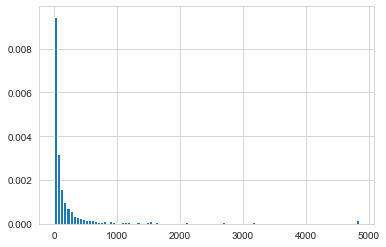

In [38]:
df['SourceInDegree'].hist(bins=100, density = True)

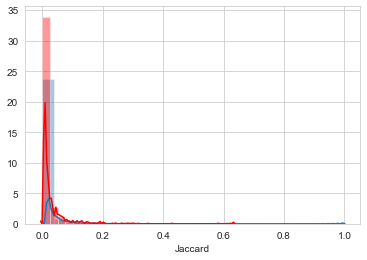

In [33]:
sns.distplot(df['Jaccard'], bins=25)
sns.distplot(test['Jaccard'], bins=25, color='r')

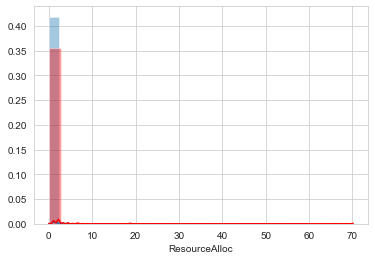

In [36]:
sns.distplot(df['ResourceAlloc'], bins=25)
sns.distplot(test['ResourceAlloc'], bins=25, color='r')

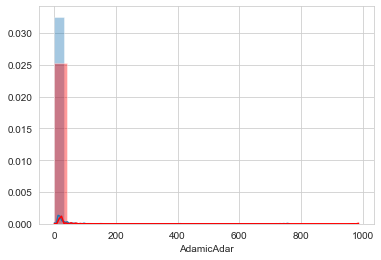

In [41]:
sns.distplot(df['AdamicAdar'], bins=25)
sns.distplot(test['AdamicAdar'], bins=25, color='r')

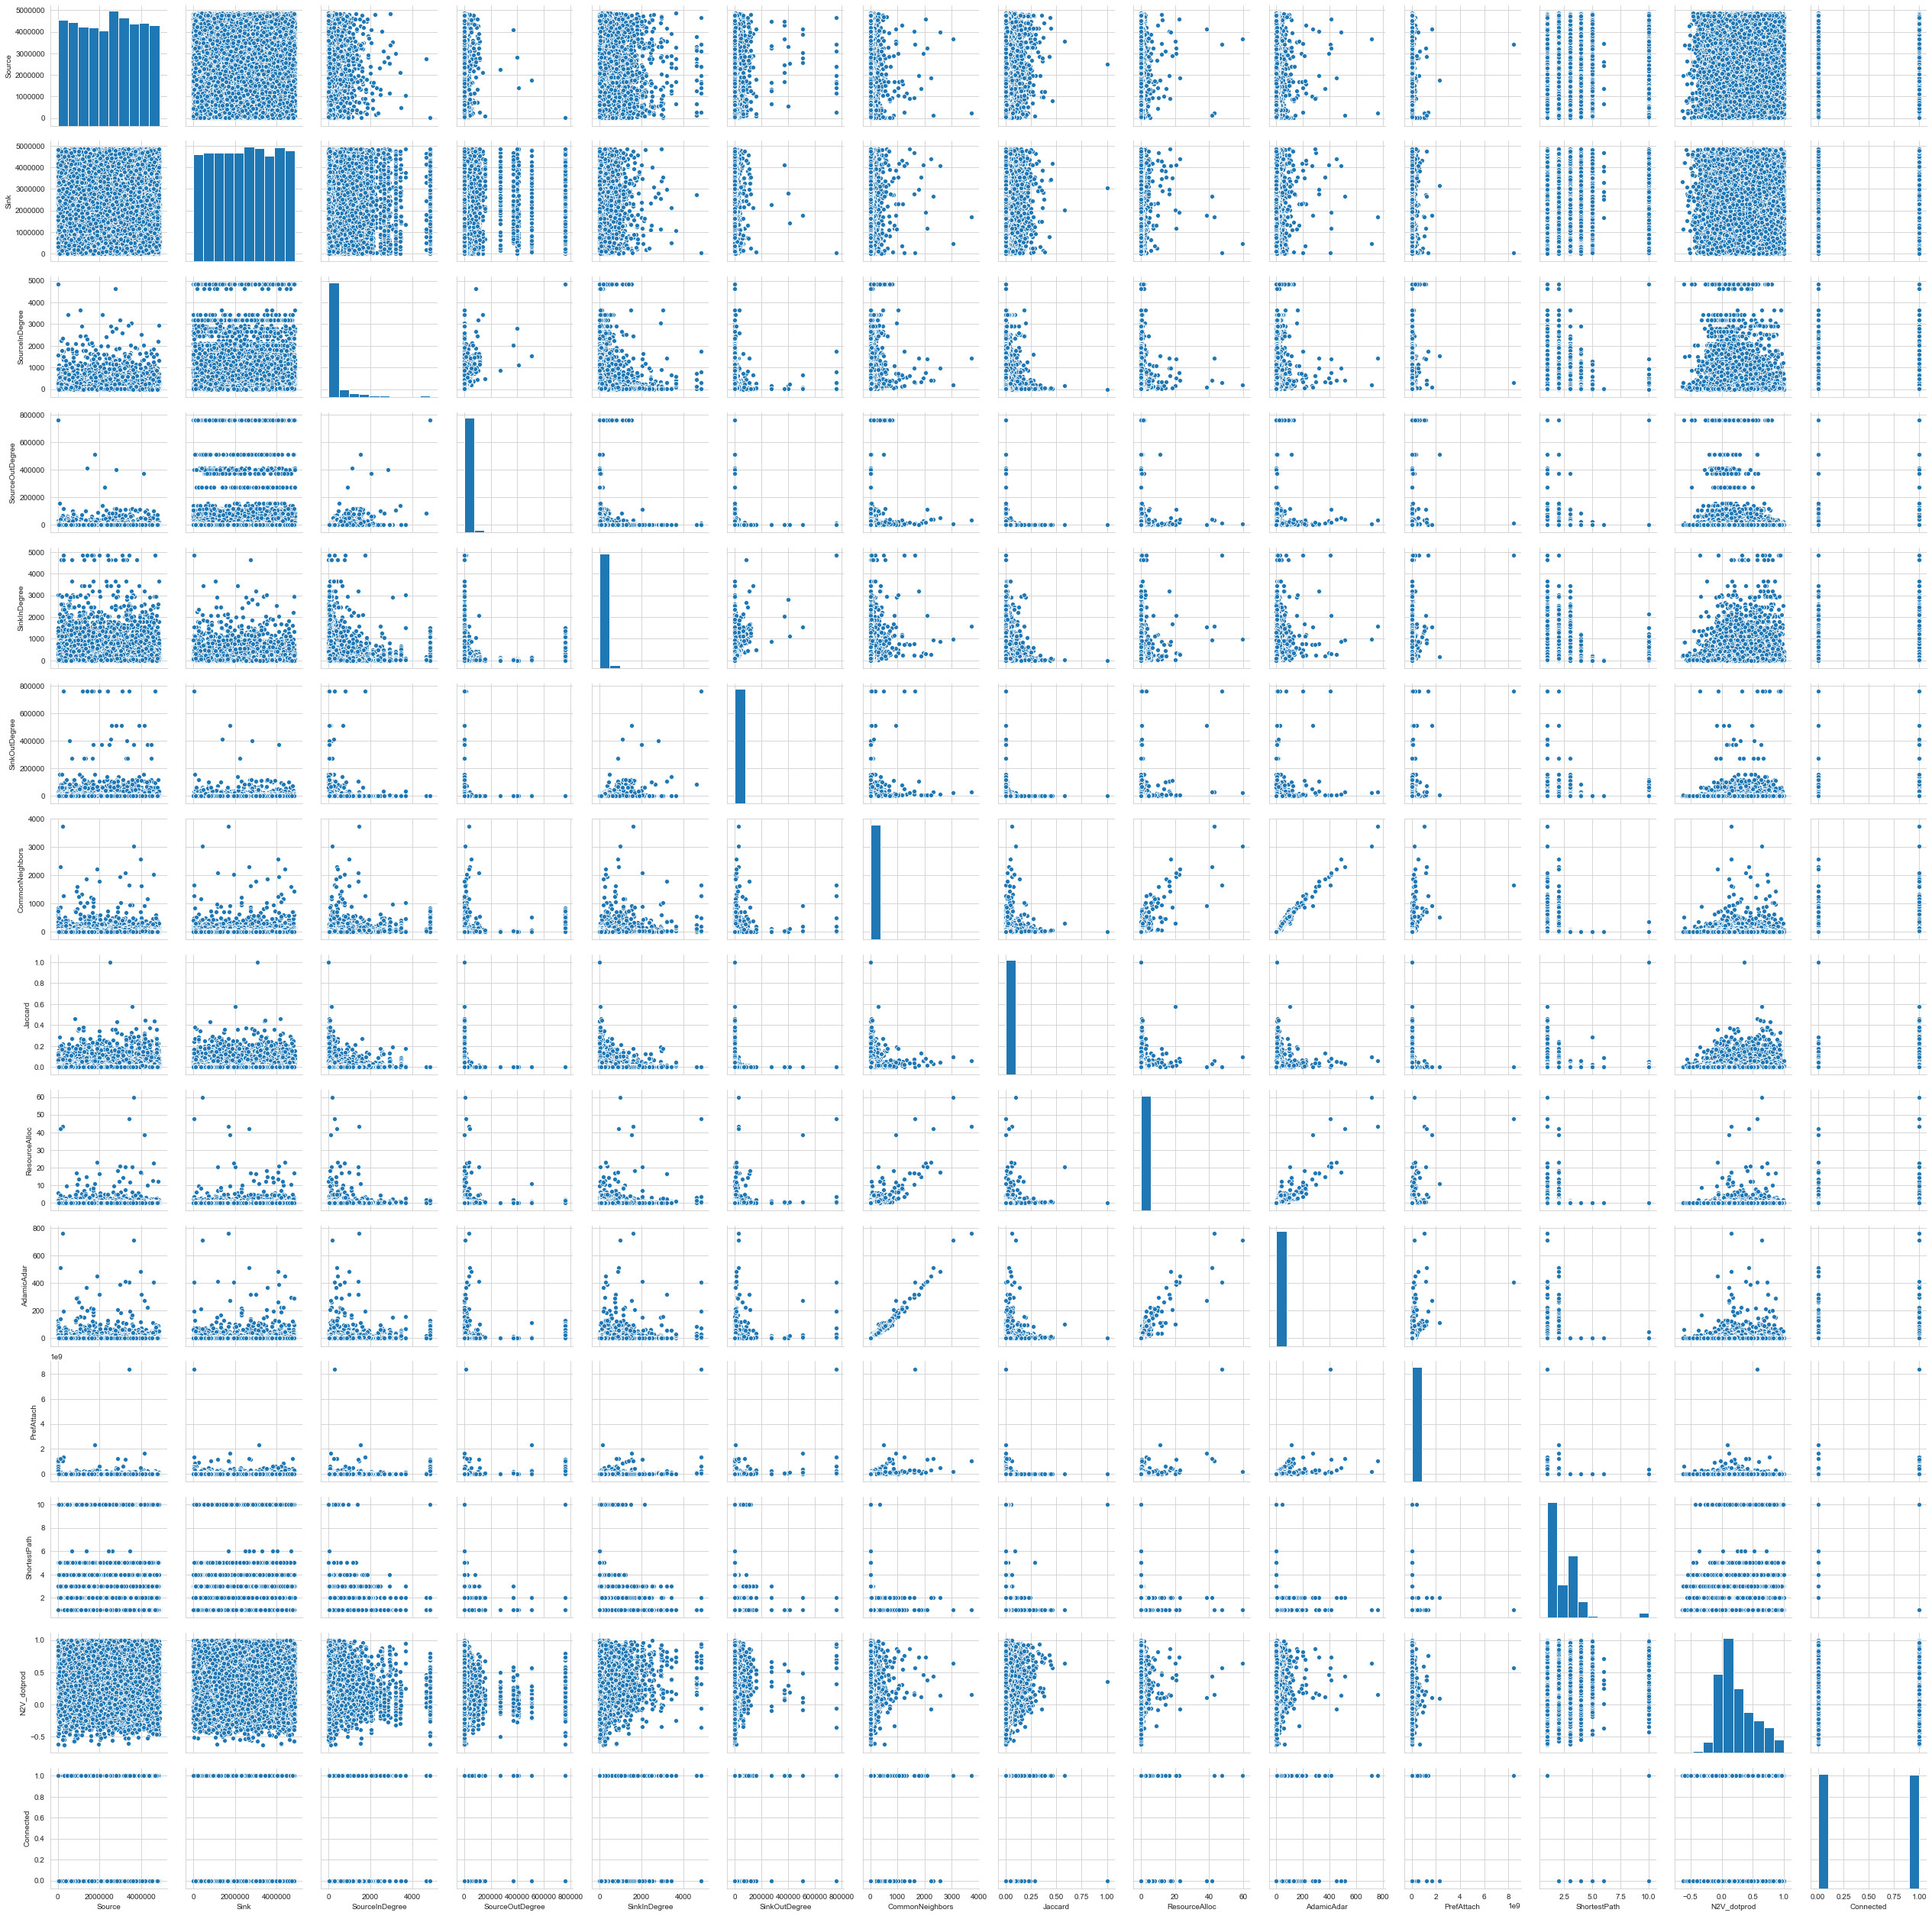

In [42]:
sns.pairplot(df, hue='Connected')

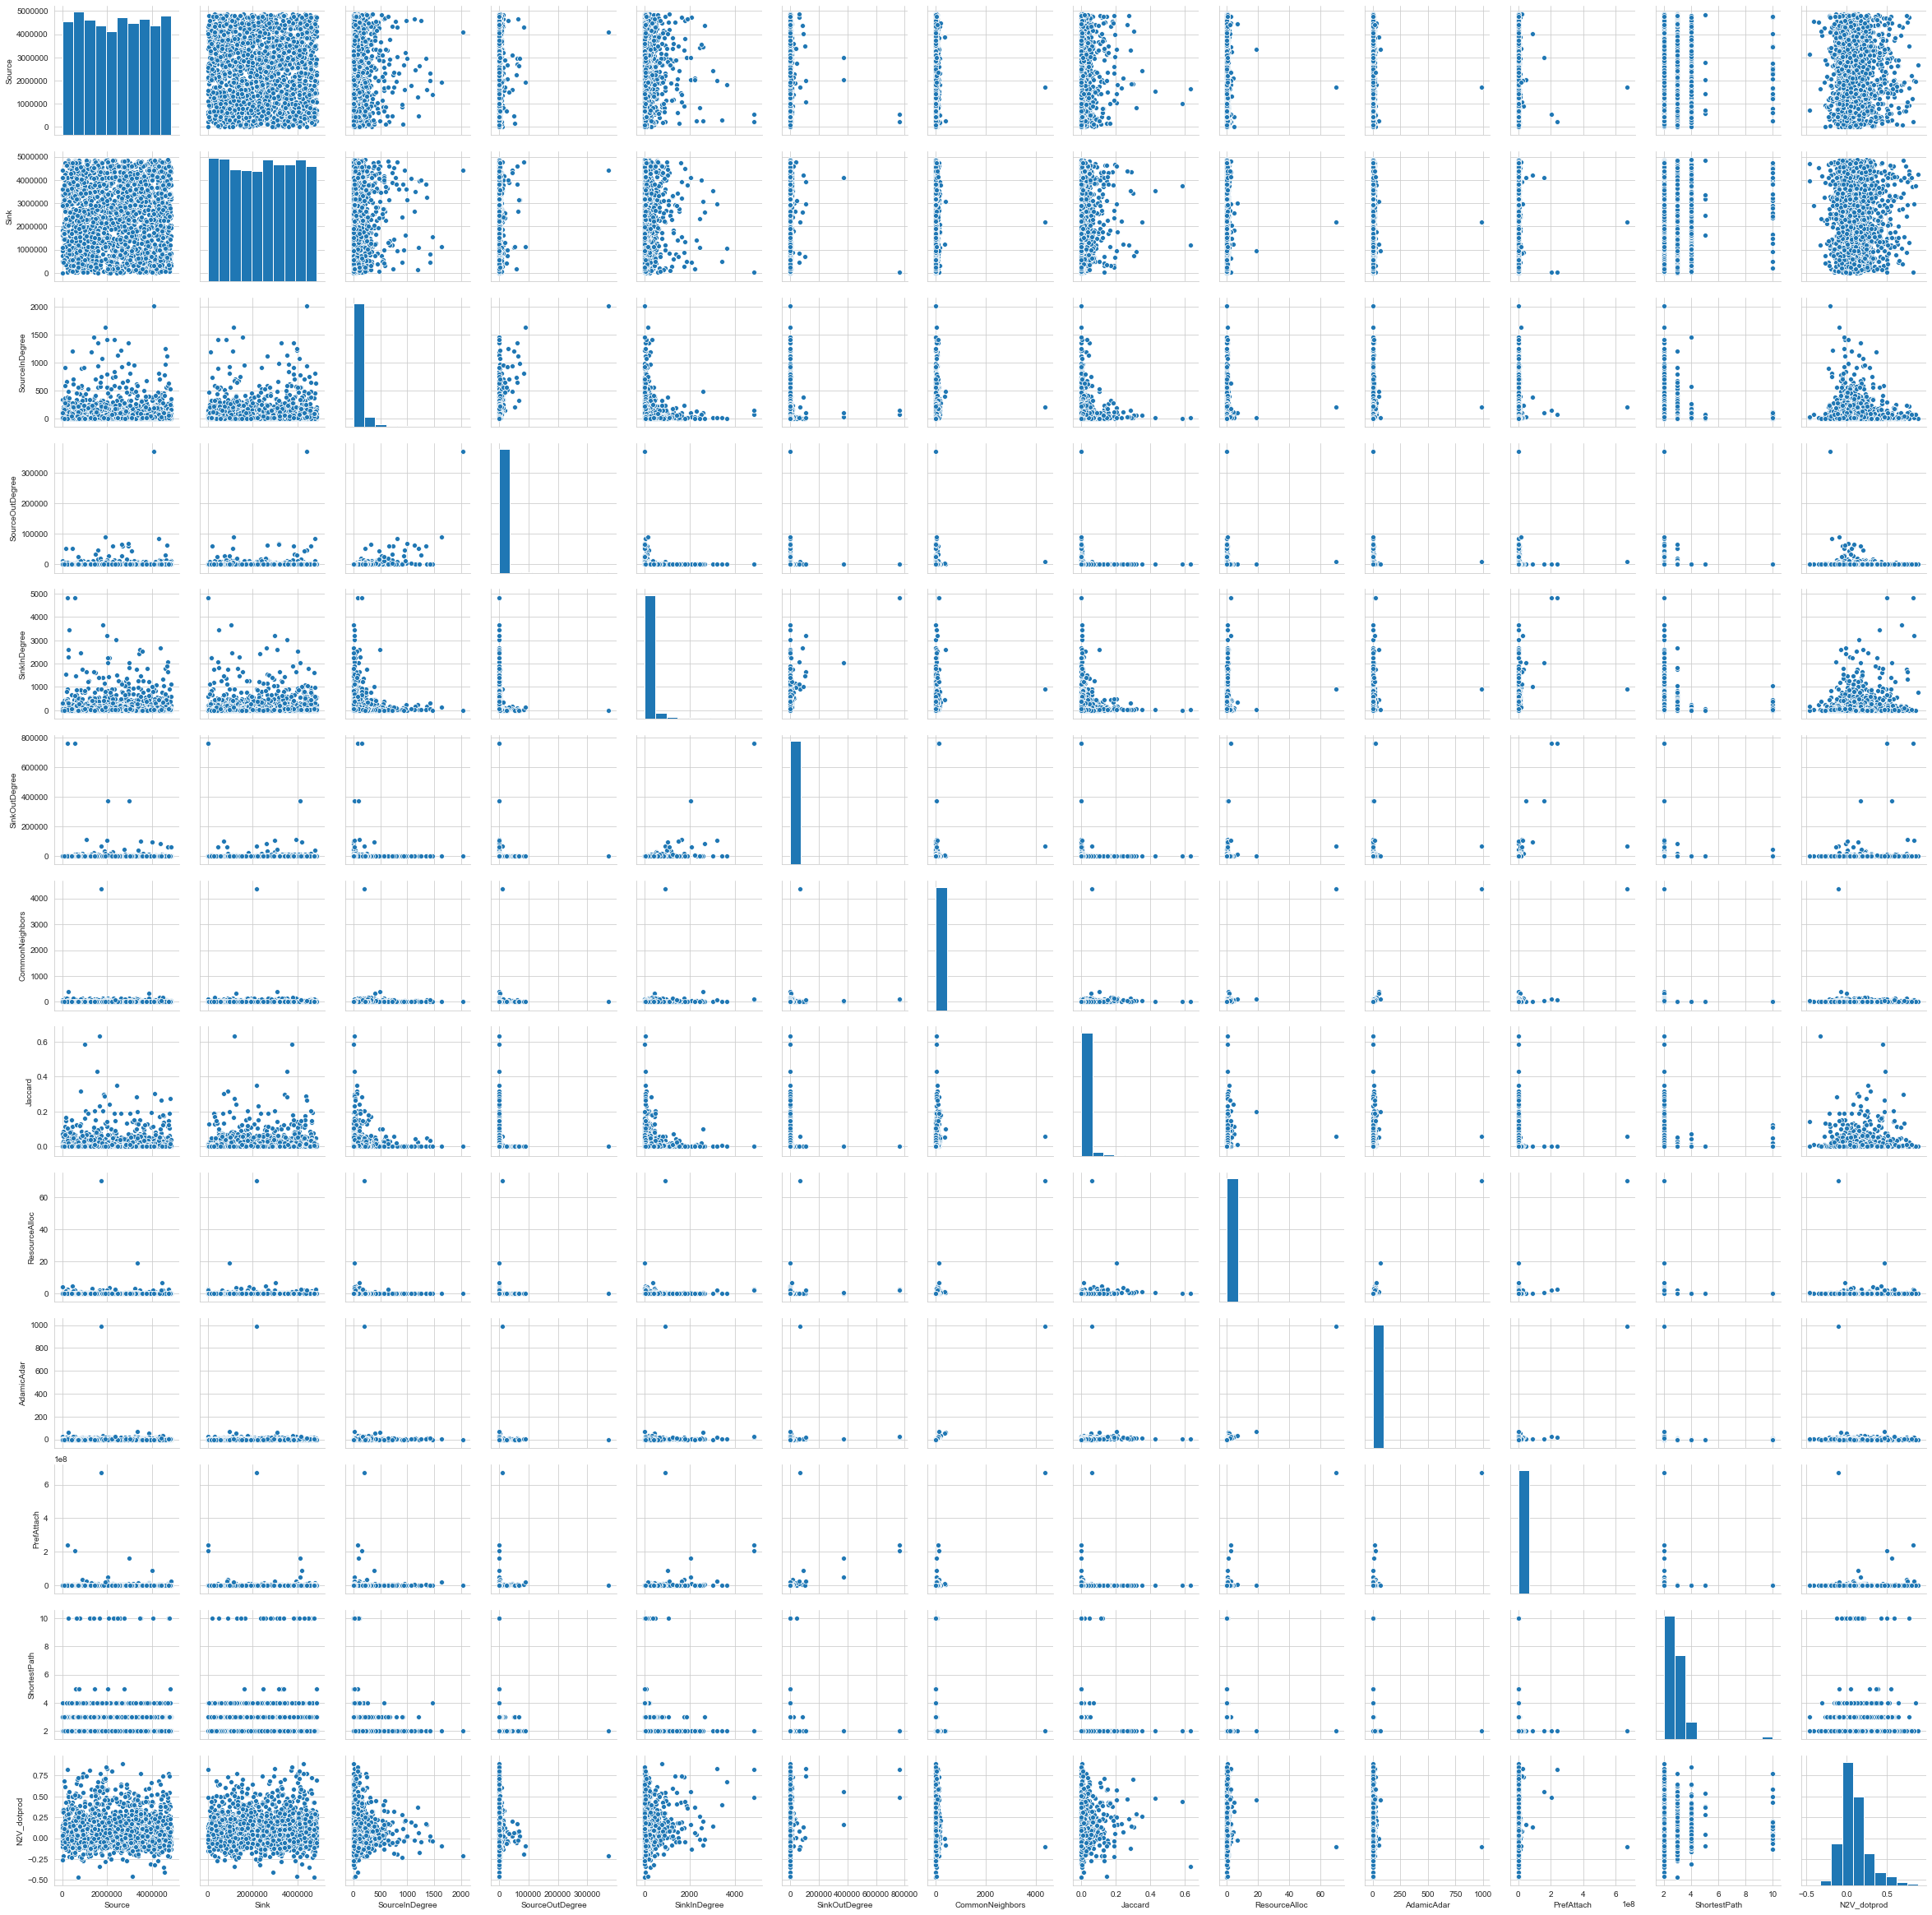

In [43]:
sns.pairplot(test)

/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mehulnagpurkar/anaconda3/envs/analytics/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


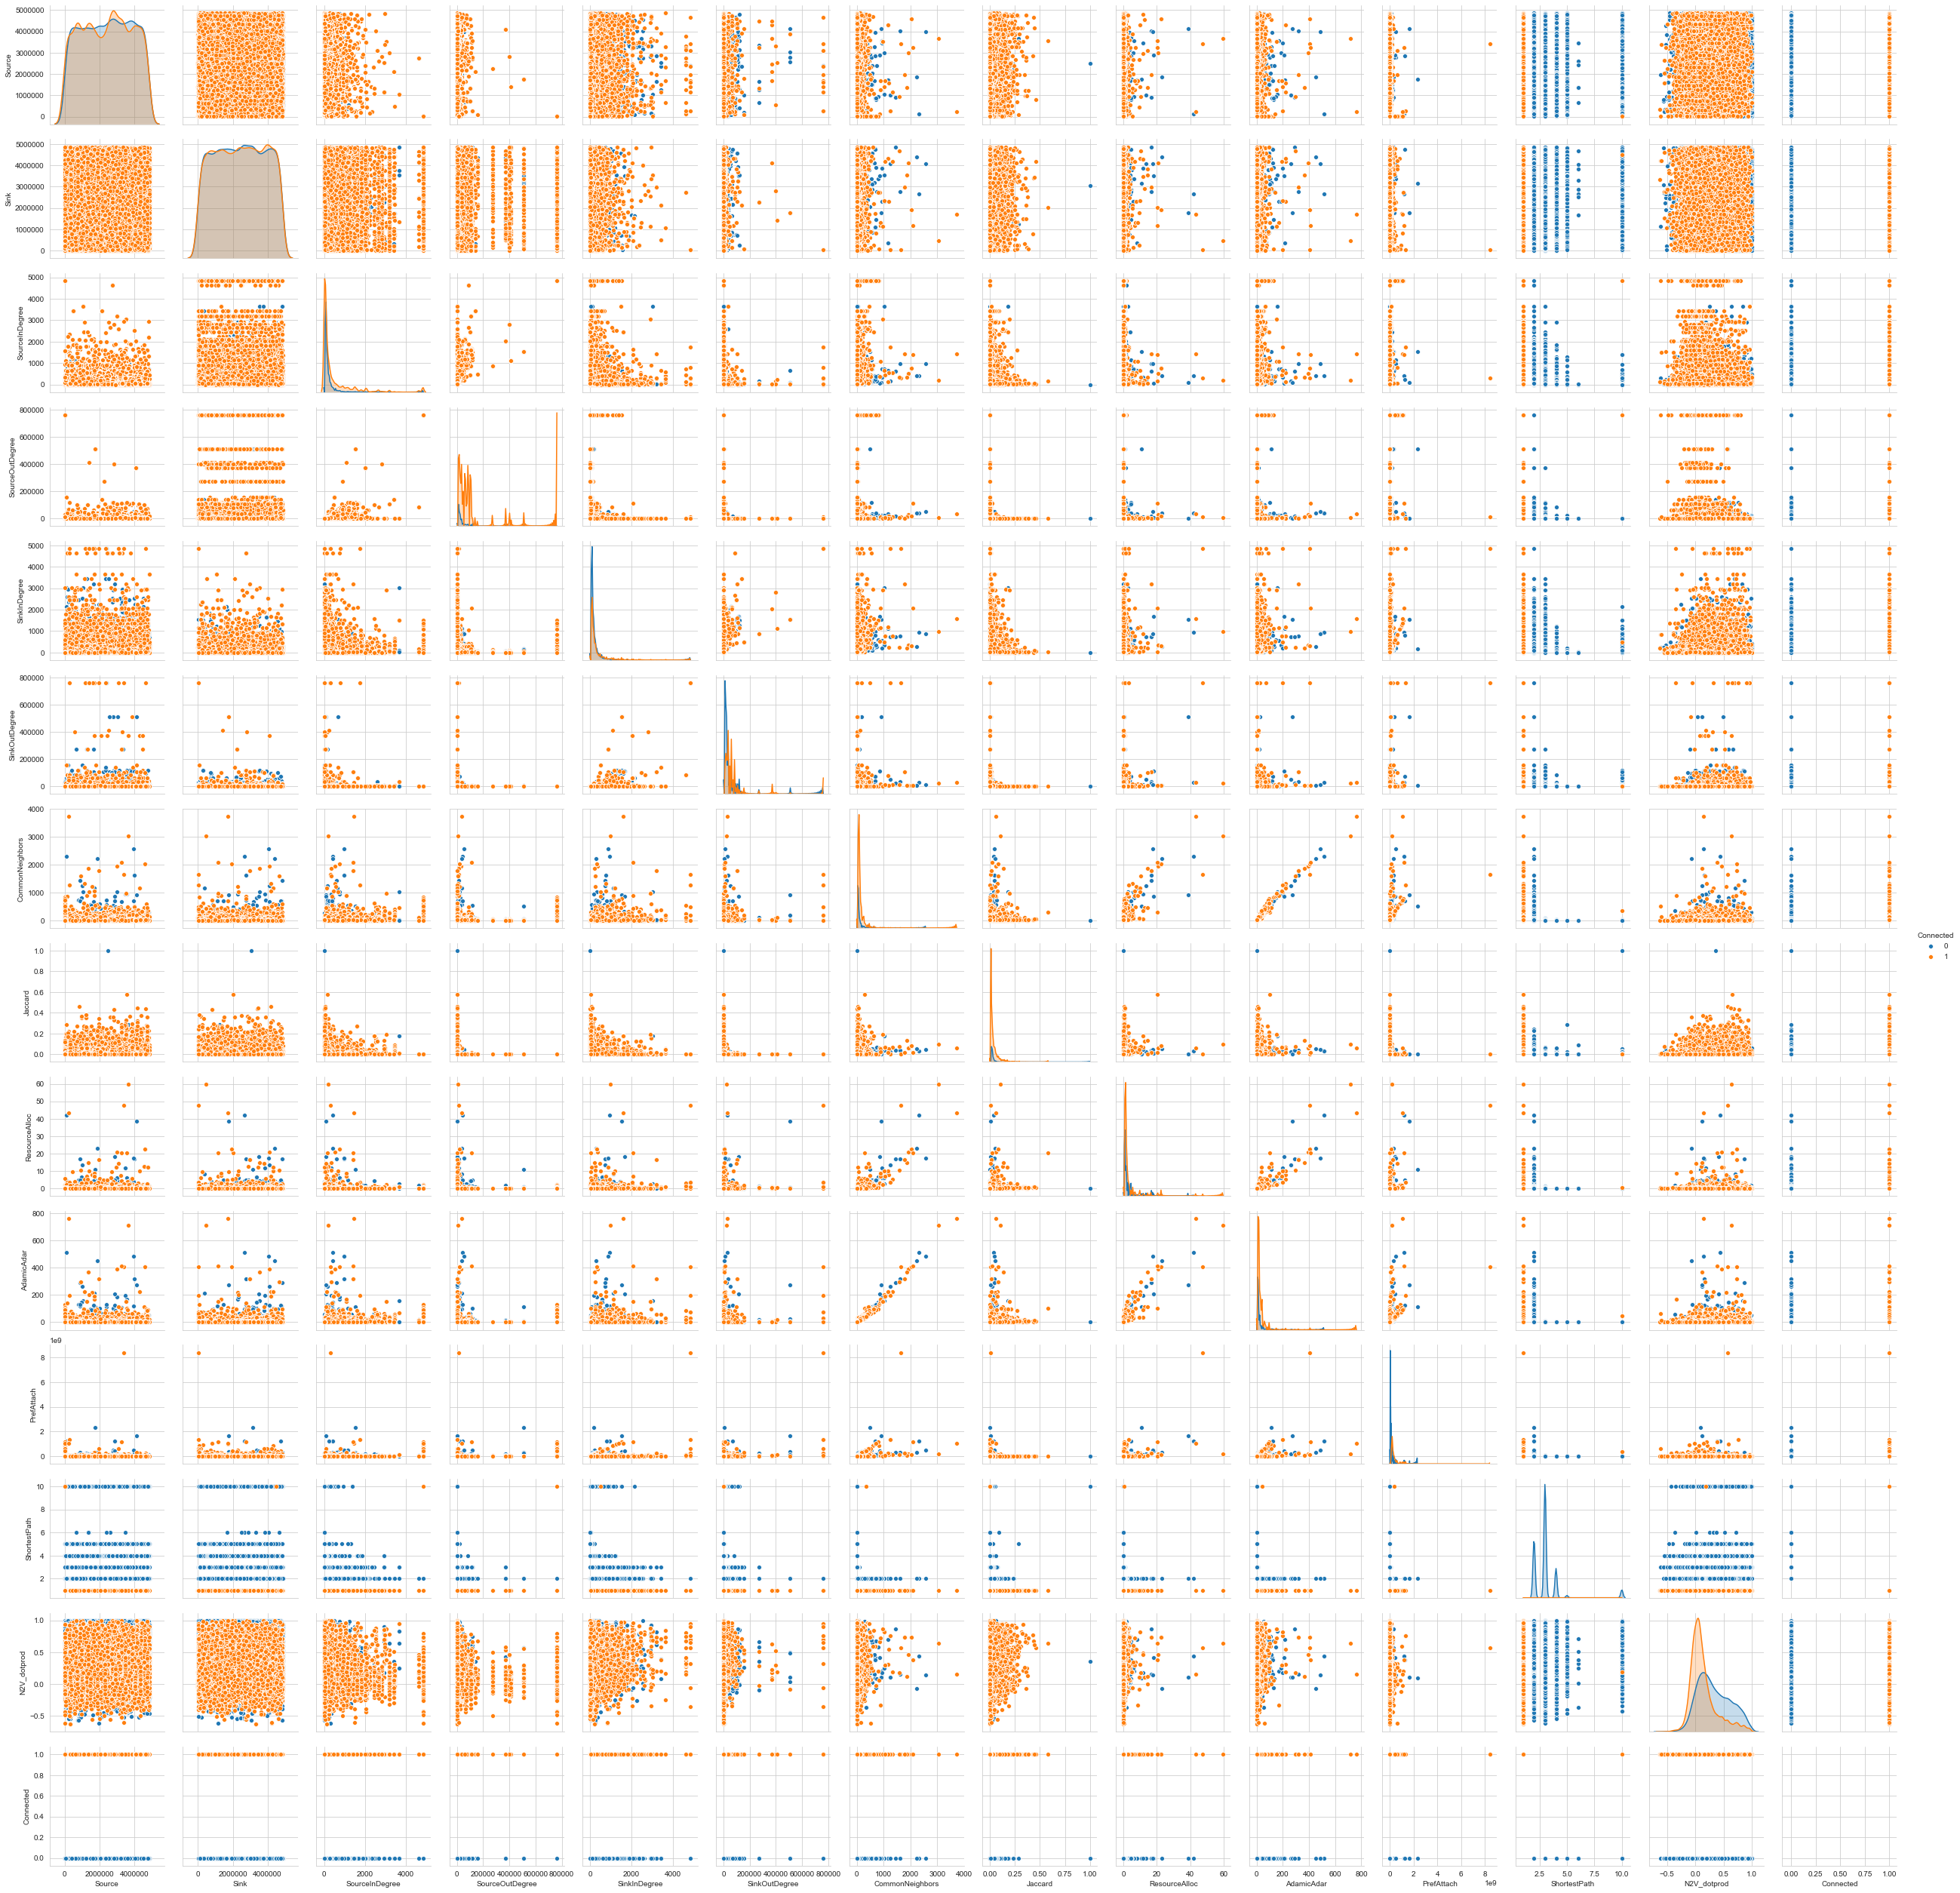

In [44]:
sns.pairplot(df, hue='Connected')

In [206]:
test.head(2)

Source     Sink  SourceInDegree  SourceOutDegree  SinkInDegree  \
0  2184483  1300190             102               83             3   
1  3151356  1452193              39              340           289   

   SinkOutDegree  CommonNeighbors  Jaccard  ResourceAlloc  AdamicAdar  \
0              0                0  0.00000        0.00000    0.000000   
1              0                4  0.00626        0.00074    0.407705   

   PrefAttach  ShortestPath  N2V_dotprod  
0         435             3     0.131168  
1      102306             2    -0.188574

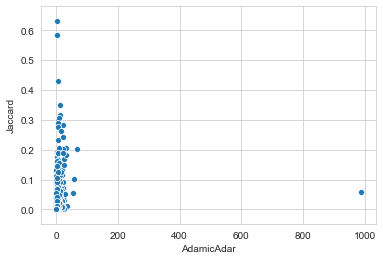

In [213]:
sns.scatterplot(x='AdamicAdar', y='Jaccard', data=test)

In [82]:
def generate_submission(predictions):
    id_list = [x for x in range(1,2001)]
    pred_list = [x for x in predictions[:,1]]
    pred = pd.DataFrame(list(zip(id_list, pred_list)), columns=['Id','Predictions'])
    pred.to_csv(f'./submissions/submit_{datetime.datetime.now()}.csv', index=False)

## Trying a couple of things

In [45]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Connected', 'Source', 'Sink', 'SinkInDegree', 'SinkOutDegree', 'SourceOutDegree', 'AdamicAdar', 'N2V_dotprod', 'CommonNeighbors'], axis = 1)
y = df['Connected']

In [49]:
df[df['Connected'] == 1]['ResourceAlloc'].describe()

count    29796.000000
mean         0.062910
std          0.687543
min          0.000000
25%          0.000000
50%          0.001145
75%          0.012377
max         59.638935
Name: ResourceAlloc, dtype: float64

In [54]:
df[df['Connected'] == 1]['ResourceAlloc'].median()

0.0011445611568480243

In [50]:
df[df['Connected'] == 0]['ResourceAlloc'].describe()

count    30000.000000
mean         0.024601
std          0.454952
min          0.000000
25%          0.000000
50%          0.000000
75%          0.001480
max         41.865227
Name: ResourceAlloc, dtype: float64

In [55]:
df[df['Connected'] == 0]['ResourceAlloc'].median()

0.0

In [53]:
len(df[df['Connected'] == 0])

30000

In [52]:
len(df[(df['Connected'] == 0) & (df['ResourceAlloc'] > 0.062910)])

1200

### Thresholding on RA

In [58]:
def update_connected(row):
    if row['Connected'] == 0 and row['ResourceAlloc'] > 0.062910:
        return 1
    else:
        return row['Connected']

In [63]:
df['Connected'] = df.apply(update_connected, axis=1)

### Using 1 predictor

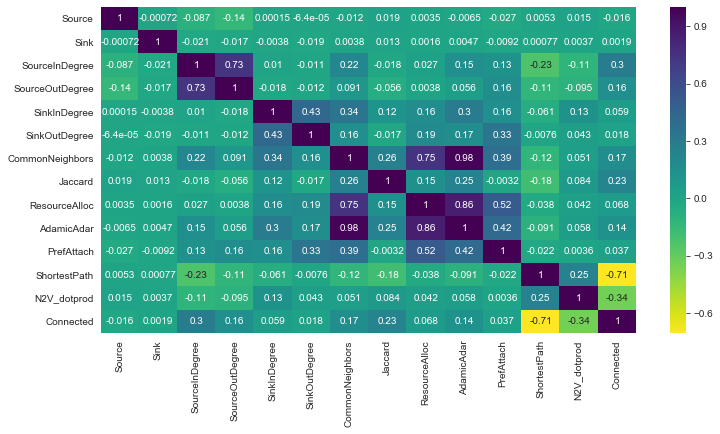

In [68]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)

In [164]:
X = df[['ShortestPath', 'CommonNeighbors']]
y = df['Connected']

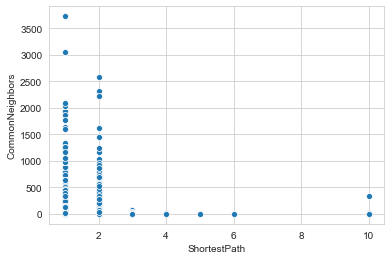

In [72]:
sns.scatterplot(x='ShortestPath', y='CommonNeighbors', data=X)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

## Using Kmeans to figure incorrectly labelled 0's

In [182]:
X.head()

ShortestPath  CommonNeighbors
0             1                9
1             1               12
2             1                1
3             1                0
4             1                0

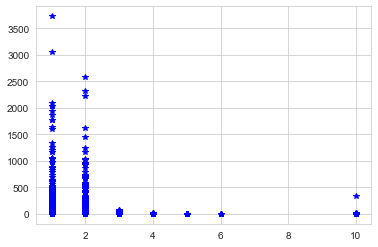

In [185]:
plt.plot(X['ShortestPath'], X['CommonNeighbors'], "b*")

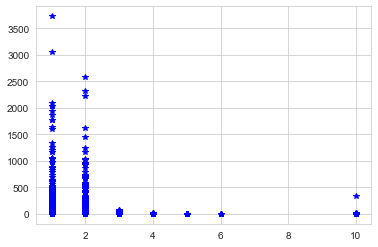

In [186]:
plt.plot(df['ShortestPath'], df['CommonNeighbors'], "b*")

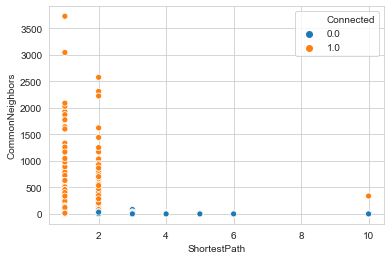

In [188]:
sns.scatterplot(df['ShortestPath'], df['CommonNeighbors'], hue=df['Connected'])

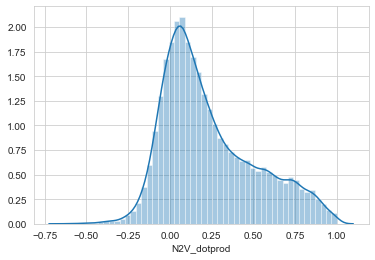

In [197]:
sns.distplot(df['N2V_dotprod'])

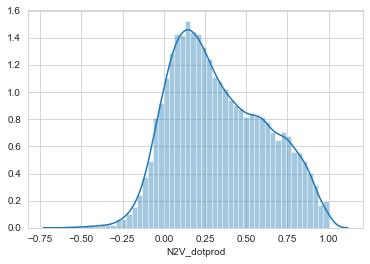

In [194]:
sns.distplot(df[df['Connected'] == 0]['N2V_dotprod'])

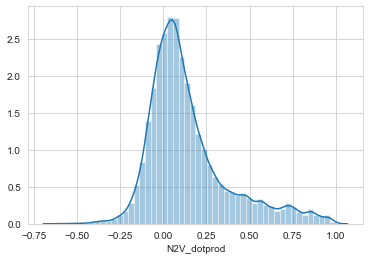

In [195]:
sns.distplot(df[df['Connected'] == 1]['N2V_dotprod'])

In [189]:
df.head()

Source     Sink  SourceInDegree  SourceOutDegree  SinkInDegree  \
0  1933312  3025121              19              167           189   
1  3025121  3178930             189              381            11   
2  3178930  1250191              11               24             4   
3  3178930  4358590              11               24             1   
4  3178930   854764              11               24             1   

   SinkOutDegree  CommonNeighbors   Jaccard  ResourceAlloc  AdamicAdar  \
0            381                9  0.013393       0.211661    2.150558   
1             24               12  0.022556       0.105732    2.245444   
2              0                1  0.027778       0.000972    0.144168   
3              0                0  0.000000       0.000000    0.000000   
4              0                0  0.000000       0.000000    0.000000   

   PrefAttach  ShortestPath  N2V_dotprod  Connected  
0       86870             1     0.285623        1.0  
1       16863             1     0.537538        1.0  
2         132             1     0.348508        1.0  
3          33             1    -0.055040        1.0  
4          33             1     0.235348        1.0

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.metrics import classification_report

In [78]:
lr = LogisticRegression(solver='lbfgs')

In [79]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
validate = lr.predict(X_test)

In [81]:
print(classification_report(y_test, validate))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2873
         1.0       1.00      0.98      0.99      3107

    accuracy                           0.99      5980
   macro avg       0.99      0.99      0.99      5980
weighted avg       0.99      0.99      0.99      5980



In [83]:
test = pd.read_csv('./finaldata/test_2k.csv')

In [163]:
label_predictors = test[['ShortestPath', 'CommonNeighbors']]

In [86]:
predictions = lr.predict_proba(label_predictors)

In [88]:
predictions

array([[9.99987898e-01, 1.21021768e-05]])

In [89]:
pred_list = [x for x in predictions[:,1]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6035c9b0>]],
      dtype=object)

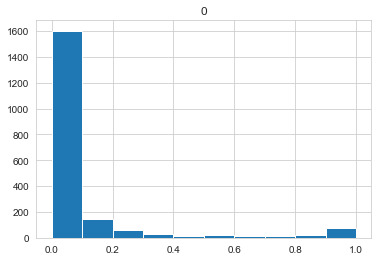

In [92]:
pd.DataFrame(pred_list).hist()

In [93]:
generate_submission(predictions)

## Random Forrest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
df.head()

Source     Sink  SourceInDegree  SourceOutDegree  SinkInDegree  \
0  1933312  3025121              19              167           189   
1  3025121  3178930             189              381            11   
2  3178930  1250191              11               24             4   
3  3178930  4358590              11               24             1   
4  3178930   854764              11               24             1   

   SinkOutDegree  CommonNeighbors   Jaccard  ResourceAlloc  AdamicAdar  \
0            381                9  0.013393       0.211661    2.150558   
1             24               12  0.022556       0.105732    2.245444   
2              0                1  0.027778       0.000972    0.144168   
3              0                0  0.000000       0.000000    0.000000   
4              0                0  0.000000       0.000000    0.000000   

   PrefAttach  ShortestPath  N2V_dotprod  Connected  
0       86870             1     0.285623        1.0  
1       16863             1     0.537538        1.0  
2         132             1     0.348508        1.0  
3          33             1    -0.055040        1.0  
4          33             1     0.235348        1.0

In [114]:
X = df[['ShortestPath', 'CommonNeighbors', 'Jaccard', 'AdamicAdar', 'PrefAttach']]
y = df['Connected']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [121]:
label_predictors = test[['ShortestPath', 'CommonNeighbors', 'Jaccard', 'AdamicAdar', 'PrefAttach']]

In [116]:
rf = RandomForestClassifier(n_estimators=10, max_features=2)

In [117]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
validate = rf.predict(X_test)

In [119]:
print(classification_report(y_test, validate))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2884
         1.0       0.99      0.99      0.99      3096

    accuracy                           0.99      5980
   macro avg       0.99      0.99      0.99      5980
weighted avg       0.99      0.99      0.99      5980



In [122]:
predictions = rf.predict_proba(label_predictors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6090cb00>]],
      dtype=object)

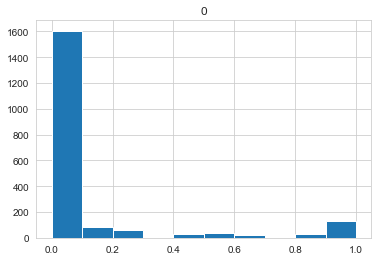

In [123]:
pred_list = [x for x in predictions[:,1]]
pd.DataFrame(pred_list).hist()

In [ ]:
generate_submission(predictions)

## XGBoost

In [124]:
from xgboost import XGBClassifier, XGBRegressor

In [126]:
model = XGBClassifier(n_estimators=3)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=3,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [127]:
validations = model.predict(X_test)

In [128]:
print(classification_report(y_test, validations))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2884
         1.0       0.99      0.99      0.99      3096

    accuracy                           0.99      5980
   macro avg       0.99      0.99      0.99      5980
weighted avg       0.99      0.99      0.99      5980



In [129]:
predictions = model.predict_proba(label_predictors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a60bdc320>]],
      dtype=object)

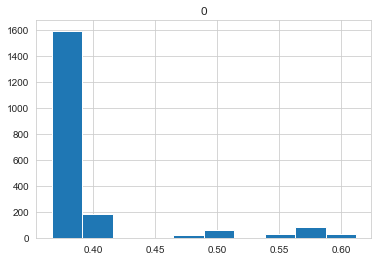

In [130]:
pred_list = [x for x in predictions[:,1]]
pd.DataFrame(pred_list).hist()

In [137]:
test['ResourceAlloc'].describe()

count    2000.000000
mean        0.102139
std         1.654372
min         0.000000
25%         0.000000
50%         0.000054
75%         0.005683
max        70.173873
Name: ResourceAlloc, dtype: float64

# NN

In [167]:
from sklearn.neural_network import MLPClassifier

In [168]:
nn = MLPClassifier(hidden_layer_sizes=(2, 50), activation='logistic', solver='sgd', learning_rate='adaptive')

In [169]:
nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [171]:
validate = nn.predict(X_test)

In [172]:
print(classification_report(y_test, validations))

              precision    recall  f1-score   support

         0.0       0.47      0.47      0.47      2876
         1.0       0.51      0.51      0.51      3104

    accuracy                           0.49      5980
   macro avg       0.49      0.49      0.49      5980
weighted avg       0.49      0.49      0.49      5980



In [173]:
predictions = nn.predict_proba(label_predictors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a63eb9c50>]],
      dtype=object)

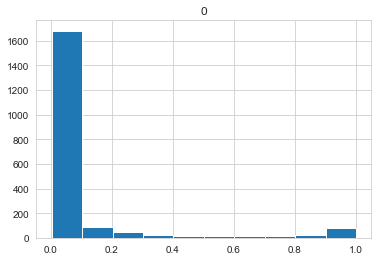

In [174]:
pred_list = [x for x in predictions[:,1]]
pd.DataFrame(pred_list).hist()

In [214]:
df.head()

Source     Sink  SourceInDegree  SourceOutDegree  SinkInDegree  \
0  1933312  3025121              19              167           189   
1  3025121  3178930             189              381            11   
2  3178930  1250191              11               24             4   
3  3178930  4358590              11               24             1   
4  3178930   854764              11               24             1   

   SinkOutDegree  CommonNeighbors   Jaccard  ResourceAlloc  AdamicAdar  \
0            381                9  0.013393       0.211661    2.150558   
1             24               12  0.022556       0.105732    2.245444   
2              0                1  0.027778       0.000972    0.144168   
3              0                0  0.000000       0.000000    0.000000   
4              0                0  0.000000       0.000000    0.000000   

   PrefAttach  ShortestPath  N2V_dotprod  Connected  
0       86870             1     0.285623        1.0  
1       16863             1     0.537538        1.0  
2         132             1     0.348508        1.0  
3          33             1    -0.055040        1.0  
4          33             1     0.235348        1.0

In [150]:
from sklearn.preprocessing import MinMaxScaler

In [151]:
scalar = MinMaxScaler()

In [152]:
scaled_df = scalar.fit_transform(test)

In [154]:
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

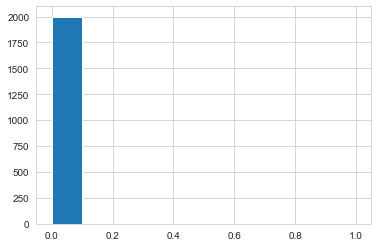

In [158]:
scaled_df['ResourceAlloc'].hist(bins=10)

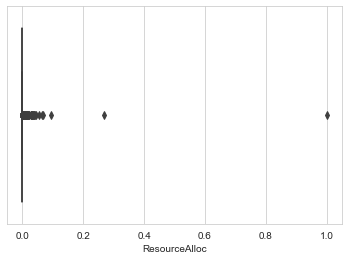

In [162]:
sns.boxplot(scaled_df['ResourceAlloc'])